In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\Amrit Krishn\FlightData\FlightData_Train.xlsx")

In [3]:
df.shape

(10683, 11)

In [4]:
test_data=pd.read_excel(r"C:\Users\Amrit Krishn\FlightData\FlightTest_set.xlsx")

In [5]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
# df = pd.concat([train_df, test_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<Axes: >

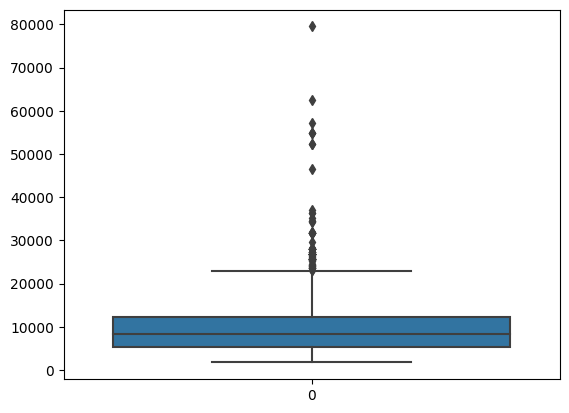

In [7]:
df.shape
import seaborn as sns
sns.boxplot(df['Price'])


<Axes: >

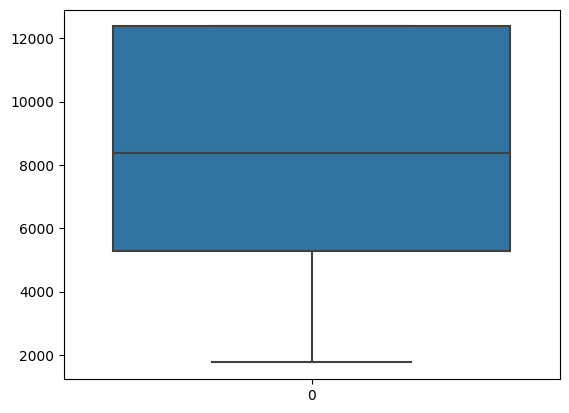

In [13]:
upper_limit = np.percentile(df['Price'], 75)
data_capped = np.minimum(df['Price'], upper_limit)

# df.columns
data_capped
df['Price']=data_capped
sns.boxplot(df['Price'])
# df['Price']

In [14]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [15]:
## Feature Engineering Process
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,12373.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,12373.0,01,03,2019


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             10683 non-null  object 
 12  Month            10683 non-null  object 
 13  Year             10683 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


In [18]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             10683 non-null  int32  
 12  Month            10683 non-null  int32  
 13  Year             10683 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.0+ MB


In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,12373.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,12373.0,1,3,2019


In [21]:
df.drop('Date_of_Journey',axis=1,inplace=True)


In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,12373.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,12373.0,1,3,2019


In [23]:
df['A_time']=df['Arrival_Time'].str.split(' ').str[0]
print(df['A_time'])

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: A_time, Length: 10683, dtype: object


In [24]:
df['A_time_hour']=df['A_time'].str.split(':').str[0]
df['A_time_min']=df['A_time'].str.split(':').str[1]


In [25]:
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.drop(['A_time'],axis=1,inplace=True)

In [26]:
df.tail()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107.0,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145.0,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229.0,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12373.0,1,3,2019,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,8h 20m,2 stops,No info,11753.0,9,5,2019,19,15


In [27]:
df['A_time_hour']=df['A_time_hour'].astype(int)
df['A_time_min']=df['A_time_min'].astype(int)


In [28]:
df['Dep_Time']=df['Dep_Time'].str.split(' ').str[0]
df['Dep_Time_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Time_min']=df['Dep_Time'].str.split(':').str[1]

In [29]:
df.drop(['Dep_Time'],axis=1,inplace=True)


In [30]:
df['Dep_Time_hour']=df['Dep_Time_hour'].astype(int)

In [31]:
df['Dep_Time_min']=df['Dep_Time_min'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10683 non-null  object 
 5   Total_Stops      10682 non-null  object 
 6   Additional_Info  10683 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             10683 non-null  int32  
 9   Month            10683 non-null  int32  
 10  Year             10683 non-null  int32  
 11  A_time_hour      10683 non-null  int32  
 12  A_time_min       10683 non-null  int32  
 13  Dep_Time_hour    10683 non-null  int32  
 14  Dep_Time_min     10683 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 959.9+ KB


In [33]:

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [34]:

df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [35]:

df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1, '3 stops':3,'4 stops':4,'nan':1})

In [36]:

df.groupby(['Total_Stops']).size().reset_index()

,Total_Stops,0
0,0,3491
1,1,5626
2,2,1520
3,3,45
4,4,1


In [37]:

df['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [38]:

df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
A_time_hour        0
A_time_min         0
Dep_Time_hour      0
Dep_Time_min       0
dtype: int64

In [39]:

df['Duration_hour']=df['Duration'].str.split('h').str[0]

In [40]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,12373.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,12373.0,1,3,2019,21,35,16,50,4


In [41]:
#df['Duration_hour']=df['Duration_hour'].astype(int)

In [42]:
df[df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2,No info,12373.0,6,3,2019,16,55,16,50,5m


In [43]:
df.drop(6474,axis=0,inplace=True)
# df.drop(13343,axis=0,inplace=True)

In [44]:
df.iloc[2660]
# df[df['Duration_min']=='']

Airline                      Jet Airways
Source                             Delhi
Destination                       Cochin
Route              DEL → IDR → BOM → COK
Duration                             27h
Total_Stops                            2
Additional_Info                  No info
Price                            12373.0
Date                                  12
Month                                  6
Year                                2019
A_time_hour                           12
A_time_min                            35
Dep_Time_hour                          9
Dep_Time_min                          35
Duration_hour                         27
Name: 2660, dtype: object

In [45]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(6)
memory usage: 1.1+

In [47]:
df['Duration_min_i']=df['Duration'].str.split('h').str[1]

In [48]:
#df['Duration_min']=df['Duration_min'].astype(int)

In [49]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min_i
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,12373.0,9,6,2019,4,25,9,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,12373.0,1,3,2019,21,35,16,50,4,45m


In [50]:
df['Duration_min']=df['Duration_min_i'].str.split('m').str[0]

In [51]:
# if df[df['Duration_min']=='']:
#     df['Duration_min']=df['Duration_min'].fillna(0)
df['Duration_min'] = df['Duration_min'].replace('', 10)

df[df['Duration_min']=='']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min_i,Duration_min


In [52]:
df['Duration_min']=df['Duration_min'].astype(int)

In [53]:
df['Duration_min'].isnull().sum()

0

In [54]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min_i,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50m,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25m,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,12373.0,9,6,2019,4,25,9,25,19,,10
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25m,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,12373.0,1,3,2019,21,35,16,50,4,45m,45


In [55]:
df['Duration_min']=df['Duration_min'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
 16  Duration_min_i   10682 non-null  object 
 17  Duration_min     

In [57]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [58]:
test_data.shape

(2671, 10)

In [59]:
df[df['Additional_Info']=='No info'].shape

(8344, 18)

In [60]:
is_nominal = df['Destination'].nunique() == len(df['Destination'])
print(f"Is 'Color' nominal? {is_nominal}")

Is 'Color' nominal? False


In [61]:
Source =df['Source']
Source = pd.get_dummies(Source,drop_first=True)
Source.head()
# df['Source'].unique()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [62]:
# Source = train_data[["Source"]]

# Source = pd.get_dummies(Source, drop_first= True)

# Source.head()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
 16  Duration_min_i   10682 non-null  object 
 17  Duration_min     

In [64]:
Airline = df['Airline']
Airline= pd.get_dummies(Airline,drop_first=True)
Destination  = df['Destination']
Destination = pd.get_dummies(Destination,drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10681 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  int64  
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  A_time_hour      10682 non-null  int32  
 12  A_time_min       10682 non-null  int32  
 13  Dep_Time_hour    10682 non-null  int32  
 14  Dep_Time_min     10682 non-null  int32  
 15  Duration_hour    10682 non-null  int32  
 16  Duration_min_i   10682 non-null  object 
 17  Duration_min     

In [65]:
df = pd.concat([df, Airline,Source,Destination], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Airline                            10682 non-null  object 
 1   Source                             10682 non-null  object 
 2   Destination                        10682 non-null  object 
 3   Route                              10681 non-null  object 
 4   Duration                           10682 non-null  object 
 5   Total_Stops                        10682 non-null  int64  
 6   Additional_Info                    10682 non-null  object 
 7   Price                              10682 non-null  float64
 8   Date                               10682 non-null  int32  
 9   Month                              10682 non-null  int32  
 10  Year                               10682 non-null  int32  
 11  A_time_hour                        10682 non-null  int32  


In [66]:
df.drop(['Airline','Source'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Destination                        10682 non-null  object 
 1   Route                              10681 non-null  object 
 2   Duration                           10682 non-null  object 
 3   Total_Stops                        10682 non-null  int64  
 4   Additional_Info                    10682 non-null  object 
 5   Price                              10682 non-null  float64
 6   Date                               10682 non-null  int32  
 7   Month                              10682 non-null  int32  
 8   Year                               10682 non-null  int32  
 9   A_time_hour                        10682 non-null  int32  
 10  A_time_min                         10682 non-null  int32  
 11  Dep_Time_hour                      10682 non-null  int32  


In [67]:
df.drop(['Destination','Route','Duration','Additional_Info','Duration_min_i'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  int64  
 1   Price                              10682 non-null  float64
 2   Date                               10682 non-null  int32  
 3   Month                              10682 non-null  int32  
 4   Year                               10682 non-null  int32  
 5   A_time_hour                        10682 non-null  int32  
 6   A_time_min                         10682 non-null  int32  
 7   Dep_Time_hour                      10682 non-null  int32  
 8   Dep_Time_min                       10682 non-null  int32  
 9   Duration_hour                      10682 non-null  int32  
 10  Duration_min                       10682 non-null  int32  
 11  Air India                          10682 non-null  bool   


In [68]:
# train_df.shape
# df.shape

In [69]:
# df_train = df.iloc[:10682]
# df_train

In [70]:
# df_test = df.iloc[10682:13352]
# df_test

In [71]:
df.shape


(10682, 31)

In [72]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_6604\1846350894.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_6604\1846350894.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\Amrit Krishn\AppData\Local\Temp\ipykernel_6604\1846350894.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\U

<Axes: >

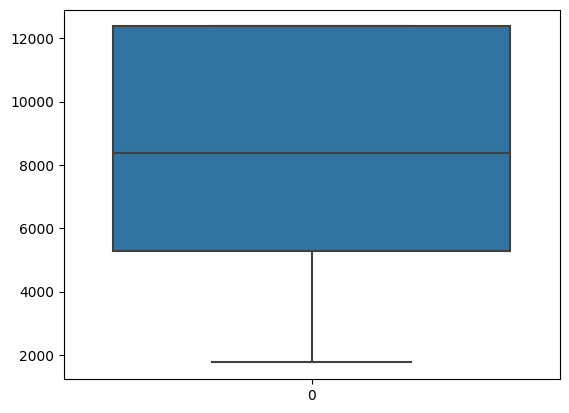

In [73]:
import seaborn as sns
sns.boxplot(df['Price'])

In [74]:
X = df.loc[:,['Total_Stops', 'Date', 'Month', 'Year', 'A_time_hour',
       'A_time_min', 'Dep_Time_hour', 'Dep_Time_min', 'Duration_hour',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
y = df.iloc[:,1]
X
# df.columns

,Total_Stops,Date,Month,Year,A_time_hour,A_time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min,...,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,2019,1,10,22,20,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,2019,13,15,5,50,7,25,...,True,False,False,False,False,False,False,True,False,False
2,2,9,6,2019,4,25,9,25,19,10,...,False,False,False,True,True,False,False,False,False,False
3,1,12,5,2019,23,30,18,5,5,25,...,True,False,False,False,False,False,False,True,False,False
4,1,1,3,2019,21,35,16,50,4,45,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,22,25,19,55,2,30,...,True,False,False,False,False,False,False,True,False,False
10679,0,27,4,2019,23,20,20,45,2,35,...,True,False,False,False,False,False,False,True,False,False
10680,0,27,4,2019,11,20,8,20,3,10,...,False,False,False,False,False,True,False,False,False,False
10681,0,1,3,2019,14,10,11,30,2,40,...,False,False,False,False,False,False,False,False,False,True


In [75]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'A_time_hour',
       'A_time_min', 'Dep_Time_hour', 'Dep_Time_min', 'Duration_hour',
       'Duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [77]:
y_train

8455      5883.0
8424      7202.0
10179    10696.0
3880     10844.0
6176     12373.0
          ...   
5734     12242.0
5191     10844.0
5390      7670.0
860       6144.0
7271      5678.0
Name: Price, Length: 7156, dtype: float64

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
y_pred = reg.predict(X_test)

In [80]:
y_pred

array([12373.   ,  5468.   ,  8983.4  , ...,  9477.96 , 12179.075,
       10160.05 ])

In [81]:
reg.score(X_test,y_test)

0.8596258623359023

In [82]:
from sklearn import metrics

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 774.9800278807032
MSE: 1509512.4094848034
RMSE: 1228.6221589588897


In [84]:
metrics.r2_score(y_test, y_pred)

0.8596258623359023

In [85]:
##Hyperparameter Tuning 


In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [99]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [100]:
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [101]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.7s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.9s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.1s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.9s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.1s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.7s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.4s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.4s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.3s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.7s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s
[CV] END max_depth=5, max_feat

C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.8s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   9.3s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.1s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.6s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.9s


C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [103]:
prediction = rf_random.predict(X_test)

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 782.46778849888
MSE: 1328909.5733147787
RMSE: 1152.783402602058


In [105]:
metrics.r2_score(y_test,prediction)

0.8764206678822245

In [95]:
##using ANN

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [108]:
Regressor = Sequential()

In [109]:
Regressor.add(Dense(units=11,activation = 'relu'))
Regressor.add(Dropout(0.2))

In [110]:
#1st HL
Regressor.add(Dense(units=7,activation ='relu'))
Regressor.add(Dropout(0.2))

In [111]:
#2nd HL
Regressor.add(Dense(units=6,activation='relu'))
Regressor.add(Dropout(0.2))

In [112]:
##output layer
Regressor.add(Dense(units=1,activation='linear'))

In [139]:
Regressor.compile(optimizer='adam',loss=tf.keras.losses.Huber(delta=1.5),metrics=['accuracy'])

In [140]:
# import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
Regressor.compile(optimizer=opt,loss=tf.keras.losses.Huber(delta=1.5),metrics=['mae'])

In [141]:
##early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [142]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_train.shape

(7156, 34)

In [143]:
model_history = Regressor.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6059.2861 - mae: 4040.2734 - val_loss: 2987.4226 - val_mae: 1992.3636
Epoch 2/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4849.9951 - mae: 3234.0793 - val_loss: 3070.5979 - val_mae: 2047.8149
Epoch 3/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4925.4497 - mae: 3284.3826 - val_loss: 2758.4722 - val_mae: 1839.7307
Epoch 4/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4811.9990 - mae: 3208.7498 - val_loss: 4804.5244 - val_mae: 3203.7668
Epoch 5/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4667.3101 - mae: 3112.2881 - val_loss: 3089.4375 - val_mae: 2060.3748
Epoch 6/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4544.0947 - mae: 3030.1467 - val_loss: 2628.9905 - val_mae: 1753.4109
Epoch 7/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4650.4189 - mae: 3101.0295 - val_loss: 2547.5879 - val_mae: 1699.1414
Epoch 8/1000
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4471.5737 - ma

In [144]:
type(y_train)

numpy.ndarray

In [145]:
X_train

array([[ 1., 12.,  6., ...,  0.,  0.,  0.],
       [ 0., 21.,  4., ...,  0.,  0.,  0.],
       [ 1.,  3.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 1., 15.,  5., ...,  0.,  0.,  0.],
       [ 0.,  3.,  3., ...,  0.,  0.,  1.],
       [ 0.,  1.,  6., ...,  0.,  0.,  0.]], dtype=float32)

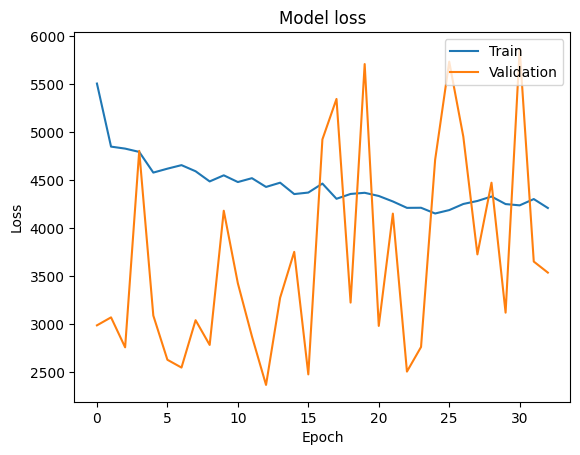

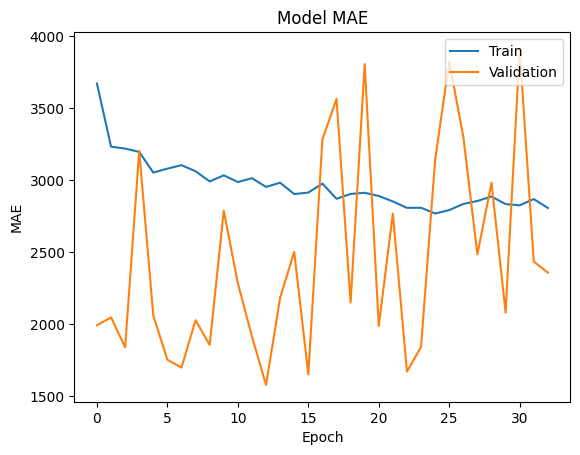

In [146]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are your true labels and predictions, respectively
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
y_pred = Regressor.predict(X_test).flatten()  # Flatten if the output is in a different shape

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error: 2360.080810546875
Mean Squared Error: 8762283.0
Root Mean Squared Error: 2960.115478515625
R-squared: 0.18516867735087839


In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import tensorflow as tf

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
Regressor = Sequential()
Regressor.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=32, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=16, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=1, activation='linear'))

# Compile the model
opt = Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
model_history = Regressor.fit(X_train_scaled, y_train, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
y_pred = Regressor.predict(X_test_scaled).flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Epoch 1/1000


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12583.9258 - mae: 8390.0312 - val_loss: 12267.6943 - val_mae: 8179.2148
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11258.2314 - mae: 7506.2378 - val_loss: 5465.3530 - val_mae: 3644.3184
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4929.4790 - mae: 3287.0693 - val_loss: 2676.7571 - val_mae: 1785.2546
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3955.9478 - mae: 2638.0486 - val_loss: 2412.7666 - val_mae: 1609.2612
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3758.6870 - mae: 2506.5413 - val_loss: 2273.1245 - val_mae: 1516.1664
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3688.4390 - mae: 2459.7092 - val_loss: 2245.5183 - val_mae: 1497.7618
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3675.3564 - mae: 2450.9883 - val_loss: 2178.0251 - val_mae: 1452.7666
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3687.4607 - mae: 2459.05

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3443.2429 - mae: 2296.2449 - val_loss: 2040.6750 - val_mae: 1361.2002
Epoch 51/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3325.5789 - mae: 2217.8022 - val_loss: 2023.4238 - val_mae: 1349.6985
Epoch 52/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3459.6497 - mae: 2307.1833 - val_loss: 1976.9276 - val_mae: 1318.7014
Epoch 53/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3456.0945 - mae: 2304.8132 - val_loss: 2007.5931 - val_mae: 1339.1453
Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3446.4661 - mae: 2298.3938 - val_loss: 1921.5256 - val_mae: 1281.7665
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3449.9961 - mae: 2300.7471 - val_loss: 1994.4542 - val_mae: 1330.3860
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3456.1987 - mae: 2304.8821 - val_loss: 1977.3921 - val_mae: 1319.0107
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3480.9500 - mae: 232

In [153]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale X and y
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Define the model
Regressor = Sequential()
Regressor.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=32, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=16, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=1, activation='linear'))

# Compile the model
opt = Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
model_history = Regressor.fit(X_train_scaled, y_train_scaled, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
y_pred_scaled = Regressor.predict(X_test_scaled).flatten()

# Inverse transform the predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Epoch 1/1000


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4790 - mae: 0.8309 - val_loss: 0.1997 - val_mae: 0.5450
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2863 - mae: 0.6271 - val_loss: 0.1629 - val_mae: 0.4830
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2446 - mae: 0.5716 - val_loss: 0.1671 - val_mae: 0.4948
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2153 - mae: 0.5354 - val_loss: 0.1582 - val_mae: 0.4792
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2050 - mae: 0.5246 - val_loss: 0.1466 - val_mae: 0.4559
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1942 - mae: 0.5061 - val_loss: 0.1461 - val_mae: 0.4580
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1801 - mae: 0.4846 - val_loss: 0.1439 - val_mae: 0.4534
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1703 - mae: 0.4724 - val_loss: 0.1357 - val_mae: 0.4336
Epoch 9/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1203 - mae: 0.3833 - val_loss: 0.0986 - val_mae: 0.3415
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1190 - mae: 0.3870 - val_loss: 0.0981 - val_mae: 0.3376
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1162 - mae: 0.3815 - val_loss: 0.0969 - val_mae: 0.3349
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1181 - mae: 0.3854 - val_loss: 0.0976 - val_mae: 0.3425
Epoch 58/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1174 - mae: 0.3785 - val_loss: 0.0963 - val_mae: 0.3326
Epoch 59/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1151 - mae: 0.3767 - val_loss: 0.0977 - val_mae: 0.3399
Epoch 60/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1186 - mae: 0.3835 - val_loss: 0.0932 - val_mae: 0.3253
Epoch 61/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1149 - mae: 0.3763 - val_loss: 0.0975 - val_mae: 0.3385
Epoch 62/1000
150/150 ━━━━━━━━━━

In [154]:
Regressor = Sequential()
Regressor.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=64, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=32, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=16, activation='relu'))
Regressor.add(Dropout(0.3))
Regressor.add(Dense(units=1, activation='linear'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_history = Regressor.fit(X_train_scaled, y_train_scaled, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on test data
y_pred_scaled = Regressor.predict(X_test_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Epoch 1/1000


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4628 - mae: 0.8347 - val_loss: 0.1921 - val_mae: 0.5350
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2578 - mae: 0.5931 - val_loss: 0.1886 - val_mae: 0.5322
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2330 - mae: 0.5591 - val_loss: 0.1778 - val_mae: 0.5094
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2161 - mae: 0.5368 - val_loss: 0.1489 - val_mae: 0.4560
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1965 - mae: 0.5054 - val_loss: 0.1639 - val_mae: 0.4886
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1915 - mae: 0.4984 - val_loss: 0.1608 - val_mae: 0.4845
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1869 - mae: 0.4901 - val_loss: 0.1652 - val_mae: 0.4936
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1775 - mae: 0.4725 - val_loss: 0.1772 - val_mae: 0.5128
Epoch 9/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1133 - mae: 0.3716 - val_loss: 0.1024 - val_mae: 0.3561
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1123 - mae: 0.3714 - val_loss: 0.1040 - val_mae: 0.3586
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1146 - mae: 0.3764 - val_loss: 0.0991 - val_mae: 0.3453
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1134 - mae: 0.3735 - val_loss: 0.1022 - val_mae: 0.3535
Epoch 58/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1101 - mae: 0.3679 - val_loss: 0.1114 - val_mae: 0.3820
Epoch 59/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1110 - mae: 0.3698 - val_loss: 0.1056 - val_mae: 0.3644
Epoch 60/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1102 - mae: 0.3701 - val_loss: 0.1083 - val_mae: 0.3701
Epoch 61/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1089 - mae: 0.3603 - val_loss: 0.1067 - val_mae: 0.3652
Epoch 62/1000
150/150 ━━━━━━━━━━

Epoch 107/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0963 - mae: 0.3432 - val_loss: 0.0926 - val_mae: 0.3207
Epoch 108/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1001 - mae: 0.3504 - val_loss: 0.1003 - val_mae: 0.3490
Epoch 109/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1088 - mae: 0.3598 - val_loss: 0.0941 - val_mae: 0.3325
Epoch 110/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1025 - mae: 0.3510 - val_loss: 0.0951 - val_mae: 0.3344
Epoch 111/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1030 - mae: 0.3553 - val_loss: 0.0928 - val_mae: 0.3143
Epoch 112/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0992 - mae: 0.3468 - val_loss: 0.0964 - val_mae: 0.3348
Epoch 113/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1021 - mae: 0.3527 - val_loss: 0.0964 - val_mae: 0.3382
Epoch 114/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0985 - mae: 0.3462 - val_loss: 0.0916 - val_mae: 0.3159
Epoch 115/1000
150/150 ━

In [155]:
# !pip install tensorflow_hub


In [159]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [160]:
# Define the autoencoder
input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder_output = Dense(16, activation='relu')(encoder)

decoder = Dense(32, activation='relu')(encoder_output)
decoder = Dense(64, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, 
                epochs=50, 
                batch_size=32, 
                validation_split=0.33, 
                verbose=1)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - loss: 0.8518 - val_loss: 0.4779
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3988 - val_loss: 0.3506
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2443 - val_loss: 0.2839
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1868 - val_loss: 0.2481
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1875 - val_loss: 0.2129
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1213 - val_loss: 0.2156
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1393 - val_loss: 0.1843
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1115 - val_loss: 0.1731
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1481 - val_loss: 0.1608
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0691 - val_loss: 0.1588
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0598 - val_loss: 0.1813
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/

In [161]:
# Define the encoder model
encoder_model = Model(inputs=input_layer, outputs=encoder_output)

# Transform training and test data
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [163]:
# Define the regressor model
input_encoded = Input(shape=(16,))
x = Dense(128, activation='relu')(input_encoded)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='linear')(x)

Regressor = Model(inputs=input_encoded, outputs=output)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Regressor.compile(optimizer=opt, loss=tf.keras.losses.Huber(delta=1.5), metrics=['mae'])

# Train the regressor
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_history = Regressor.fit(X_train_encoded, y_train_scaled, validation_split=0.33, 
                              batch_size=32, epochs=1000, 
                              callbacks=[early_stopping, model_checkpoint])


Epoch 1/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.6586 - mae: 0.9837 - val_loss: 0.3111 - val_mae: 0.7045
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3758 - mae: 0.7433 - val_loss: 0.2568 - val_mae: 0.6309
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3113 - mae: 0.6641 - val_loss: 0.2469 - val_mae: 0.6163
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2834 - mae: 0.6334 - val_loss: 0.2337 - val_mae: 0.5967
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2549 - mae: 0.5910 - val_loss: 0.2280 - val_mae: 0.5904
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2399 - mae: 0.5751 - val_loss: 0.2233 - val_mae: 0.5819
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2313 - mae: 0.5585 - val_loss: 0.1941 - val_mae: 0.5348
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2186 - mae: 0.5414 - val_loss: 0.1812 - val_mae: 0.5128
Epoch 9/1000
150/150 ━━━━━━━━━━━━━━━━━

Epoch 54/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1454 - mae: 0.4236 - val_loss: 0.1269 - val_mae: 0.3993
Epoch 55/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1505 - mae: 0.4289 - val_loss: 0.1254 - val_mae: 0.4037
Epoch 56/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1481 - mae: 0.4240 - val_loss: 0.1222 - val_mae: 0.3939
Epoch 57/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1362 - mae: 0.4096 - val_loss: 0.1256 - val_mae: 0.4026
Epoch 58/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1479 - mae: 0.4238 - val_loss: 0.1292 - val_mae: 0.4064
Epoch 59/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1479 - mae: 0.4276 - val_loss: 0.1238 - val_mae: 0.3967
Epoch 60/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1450 - mae: 0.4197 - val_loss: 0.1222 - val_mae: 0.3942
Epoch 61/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1592 - mae: 0.4402 - val_loss: 0.1316 - val_mae: 0.4183
Epoch 62/1000
150/150 ━━━━━━━━━━

In [164]:
# Evaluate the model on test data
y_pred_scaled = Regressor.predict(X_test_encoded).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Absolute Error: 1262.900634765625
Mean Squared Error: 2493068.5
Root Mean Squared Error: 1578.9454345703125
R-squared: 0.7681619941481642
